In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid', {'axis.edgecolor': '0.2',
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })
%matplotlib inline

In [2]:
def get_num_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumAtoms()

In [3]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [4]:
# df_train = pd.read_csv('gen_model/lipo_cleaned.smi', names=['SMILES'])
df_train = pd.read_csv('pred_models/rf_lipo_preds.csv')
df_train['num_atoms'] = df_train.SMILES.apply(get_num_atoms)
df_train['molecular_weight'] = df_train.SMILES.apply(get_MW)
df_train

,SMILES,split,lipo_true,lipo_pred,num_atoms,molecular_weight
0,COCCNCc1ccc(CCNCC(O)c2ccc(O)c3[nH]c(=O)sc23)cc1,train,-0.54,-0.169700,29,417.531
1,CCCC(CN1CCCC1)N(C)C(=O)Cc1ccc(Cl)c(Cl)c1,train,2.27,2.305028,23,357.325
2,C#CC(C)n1c(=O)c2c(-c3cncn3C)n(Cc3ccnc4ccc(Cl)c...,train,3.59,3.564750,37,513.989
3,O=C1Nc2ccc(S(=O)(=O)N3CCCC3CNc3ccccc3)cc2C1=O,train,2.40,2.453015,27,385.445
4,N#Cc1cnn2c(N)cc(-c3cccs3)nc12,train,2.30,2.263371,17,241.279
...,...,...,...,...,...,...
4092,COc1cc2ncnc(Oc3cnn(CC(=O)Nc4ccc(N(C)C)cn4)c3)c...,test,2.36,2.649242,33,449.471
4093,O=C(NC(Cc1ccc(N2CCN(c3ccccc3)CC2)cc1)C(=O)O)c1...,test,0.08,1.075967,34,498.410
4094,CCNC(=O)Nc1nc2cc(-c3cccnc3)ccc2[nH]1,test,2.34,2.677532,21,281.319
4095,N#Cc1c(-c2ccc(-c3ccccc3OC(F)(F)F)cc2)nc2ccncc2c1O,test,3.45,3.044362,30,407.351


In [5]:
df_gen = pd.read_csv('gen_model/generated_smiles_agent2.csv')
df_gen['num_atoms'] = df_gen.SMILES.apply(get_num_atoms)
df_gen['molecular_weight'] = df_gen.SMILES.apply(get_MW)
df_gen

,SMILES,inchi_key,rf_lipo,num_atoms,molecular_weight
0,CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNSCCO)c2ccc(F)cn2)...,ADTUXCNBIXBEQQ-UHFFFAOYSA-N,1.589061,33,476.513
1,CCOc1cc(Nc2nc3c(cc2F)ncn3C(Cc2ccccn2)c2ccc(Cl)...,AKKWXMWMVDOJLF-UHFFFAOYSA-N,2.983659,34,478.919
2,CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(CCn3ccnc3)...,AOYKKRUPGIWZBC-UHFFFAOYSA-N,2.847388,35,477.504
3,CCOc1cc(Nc2nc3c(cc2F)ncn3C(c2ccc(F)cn2)C2CC2)n...,APJDIFPSGFJUOP-UHFFFAOYSA-N,2.786052,30,411.416
4,CCOc1cc(Nc2nc3c(cc2F)ncn3C(C)c2ccc(SCCCCCCCOCC...,BCXIETMNCGCDEO-UHFFFAOYSA-N,3.064785,40,571.723
...,...,...,...,...,...
195,CCOc1cc(Nc2nc3c(cc2F)ncn3C(CCN2CCCC2)c2ccc(F)c...,ZKLILVRFGVFHOF-UHFFFAOYSA-N,2.486925,34,468.512
196,CCOc1cc(Nc2nc3c(cc2F)ncn3C(C#N)c2ccc(F)cn2)n[nH]1,ZNDVPZUTLLTSJW-UHFFFAOYSA-N,2.653389,29,396.361
197,CCOc1cc(Nc2nc3c(cc2F)ncn3C(CN2CCCC2)c2ccc(F)cn...,ZPDCAGDEKDWOLK-UHFFFAOYSA-N,2.491648,33,454.485
198,CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNCCc2ccc(F)cc2F)c2...,ZUZONYPVXFUHHV-UHFFFAOYSA-N,2.390000,40,552.561


In [6]:
sns.set_style('darkgrid', {'axis.edgecolor': 'black',
                           'axes.linewidth': 2,
                           'xtick.bottom': True,
                           'ytick.bottom': True,
                          })

Visually confirm that the biasing worked i.e., the generated molecules should be drawn from a distribution that generally restricts MW to 400-600 and logD between 1-3.

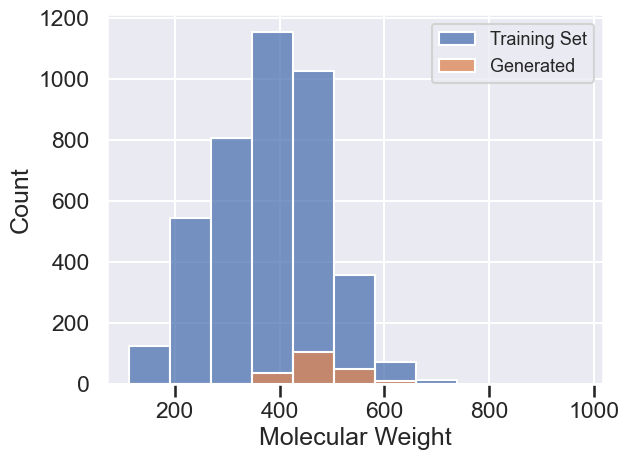

In [7]:
target = 'molecular_weight'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Molecular Weight')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

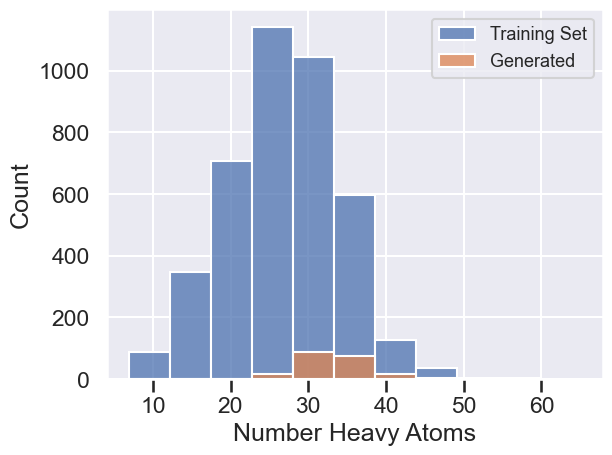

In [8]:
target = 'num_atoms'
bins = np.histogram_bin_edges(df_train[target], bins=11)
ax = sns.histplot(x=df_train[target], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen[target], bins=bins, label='Generated')

ax.set_xlabel('Number Heavy Atoms')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

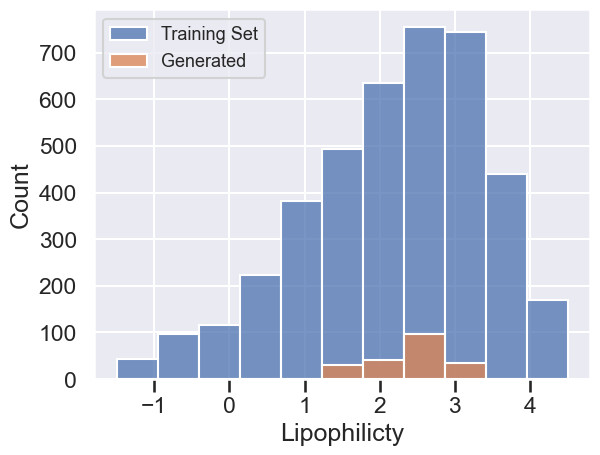

In [9]:
bins = np.histogram_bin_edges(df_train['lipo_true'], bins=11)
ax = sns.histplot(x=df_train['lipo_true'], bins=bins, label='Training Set')
ax = sns.histplot(x=df_gen['rf_lipo'], bins=bins, label='Generated')

ax.set_xlabel('Lipophilicty')
ax.set_ylabel('Count')
ax.legend(fontsize=13)
fig = ax.get_figure()

In [10]:
df_train.describe()

,lipo_true,lipo_pred,num_atoms,molecular_weight
count,4097.000000,4097.000000,4097.000000,4097.000000
mean,2.196087,2.199289,26.995607,382.520615
std,1.199093,0.996588,7.233378,103.760856
min,-1.500000,-1.107900,7.000000,113.160000
25%,1.440000,1.598890,22.000000,306.369000
50%,2.370000,2.350489,27.000000,388.383000
75%,3.100000,2.971376,32.000000,456.912000
max,4.500000,4.364222,65.000000,974.634000


In [11]:
df_gen.describe()

,rf_lipo,num_atoms,molecular_weight
count,200.000000,200.000000,200.000000
mean,2.436112,33.805000,479.233550
std,0.474462,4.000876,58.589536
min,1.291600,28.000000,381.415000
25%,2.085525,31.000000,445.417500
50%,2.592832,33.000000,472.031000
75%,2.805263,36.250000,515.313750
max,3.181324,47.000000,670.900000


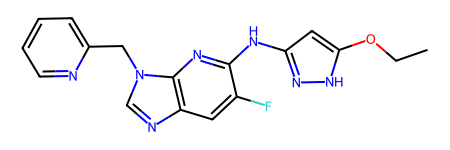

In [12]:
pattern = 'CCOc1cc(Nc2nc3c(cc2F)ncn3Cc2ccccn2)n[nH]1'
mol_pattern = Chem.MolFromSmiles(pattern)
mol_pattern

In [13]:
mols = []
HIGHLIGHT_ATOMS_LIST = []
HIGHLIGHT_BONDS_LIST = []
LEGENDS = []
num_matches = 0
for i, s in enumerate(df_gen.SMILES.values[:21]):
    print(f'{i}: ', s)
    m = Chem.MolFromSmiles(s)
    mols.append(m)
    LEGENDS.append(str(i))
    match = m.GetSubstructMatches(mol_pattern)
    if match:
        HIGHLIGHT_ATOMS_LIST.append(match[0])
        num_matches += 1
    else:
        HIGHLIGHT_ATOMS_LIST.append([])
    HIGHLIGHT_BONDS_LIST.append([])   # append empty list to not highlight bonds

0:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNSCCO)c2ccc(F)cn2)n[nH]1
1:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(Cc2ccccn2)c2ccc(Cl)cn2)n[nH]1
2:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(CCn3ccnc3)cn2)n[nH]1
3:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(c2ccc(F)cn2)C2CC2)n[nH]1
4:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(C)c2ccc(SCCCCCCCOCCOC)cn2)n[nH]1
5:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNCCc2ccccc2)c2ccc(O)cn2)n[nH]1
6:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CSCCO)c2ccc(Cl)cn2)n[nH]1
7:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(C#CCS(C)(=O)=O)cn2)n[nH]1
8:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNSC)c2ccc(F)cn2)n[nH]1
9:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CSCC)c2ccc(S(=O)(=O)CCCNCCCCCCO)cn2)n[nH]1
10:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(C)c2ccc([SH](C)c3cc(Cl)ccc3F)cn2)n[nH]1
11:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CNCCS(C)(=O)=O)c2ccc(F)cn2)n[nH]1
12:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(Br)cn2)n[nH]1
13:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CN2CCCOCC2)c2ccc(F)cn2)n[nH]1
14:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(C#N)cn2)n[nH]1
15:  CCOc1cc(Nc2nc3c(cc2F)ncn3C(CO)c2ccc(C#CCCNCCCOC)cn2)n[nH]1
16:  CCOc1c

In [14]:
print(f'{num_matches} molecules contained the scaffold')

21 molecules contained the scaffold


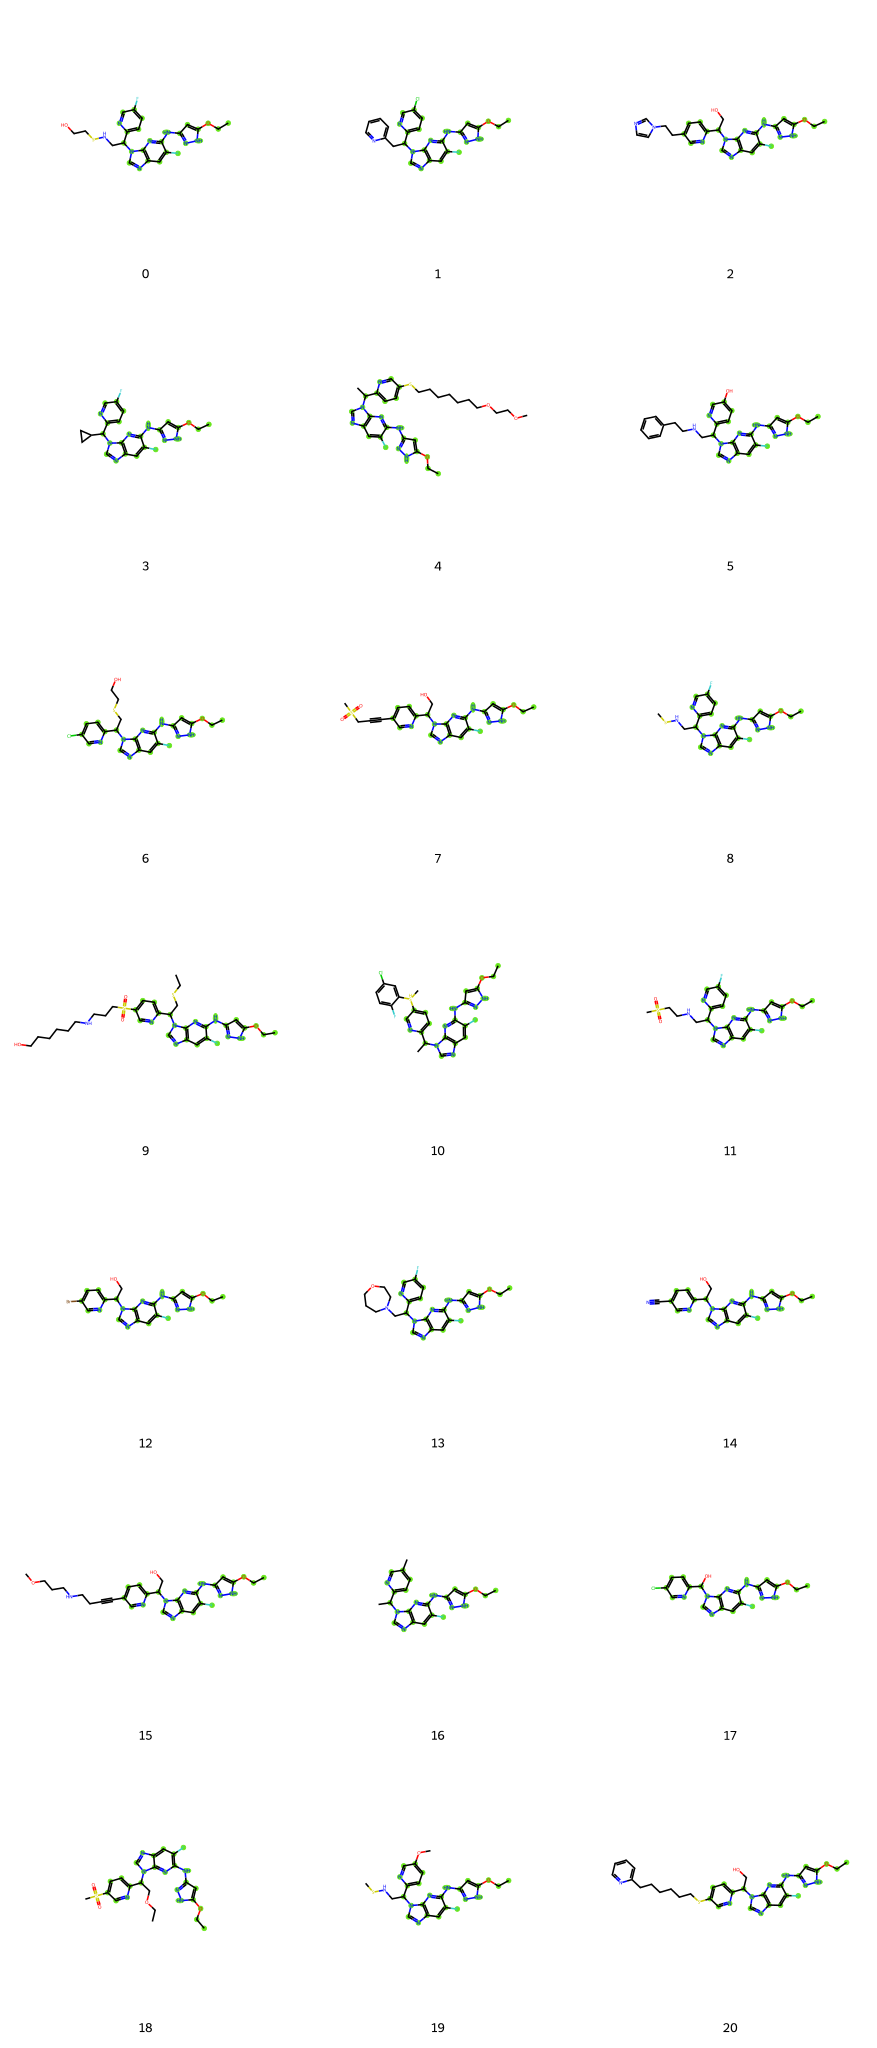

In [15]:
size = 375
img = Draw.MolsToGridImage(mols,
                           legends=LEGENDS,
                           subImgSize=(size, size),
                           highlightAtomLists=HIGHLIGHT_ATOMS_LIST,
                           highlightBondLists=HIGHLIGHT_BONDS_LIST,
                           highlightAtomColors=[{i: (0.4, 0.9, 0.1) for i in range(100)}]*len(mols),
                           molsPerRow=3,
                           useSVG=True,
                           maxMols=999,
                           )
img